In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
dataset = pd.read_csv('iris-data-clean.csv')

In [51]:
dataset = dataset.reset_index(drop=True)
    
dataset['class'] = dataset['class'].replace('Iris-setosa', ord('A')).replace('Iris-versicolor', ord('b')).replace('Iris-virginica', ord('C'))

x = dataset.iloc[:, [0, 1]].values
x2 = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,87.483221
std,0.799542,0.430104,1.758720,0.762191,15.796683
min,4.400000,2.000000,1.000000,0.100000,65.000000
25%,5.100000,2.800000,1.600000,0.300000,65.000000
50%,5.800000,3.000000,4.400000,1.300000,98.000000
75%,6.400000,3.300000,5.100000,1.800000,99.000000
max,7.900000,4.400000,6.900000,2.500000,99.000000


In [52]:
dataset

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.20,65
1,4.9,3.0,1.4,0.20,65
2,4.7,3.2,1.3,0.20,65
3,4.6,3.1,1.5,0.20,65
4,5.0,3.6,1.4,0.20,65
5,5.4,3.9,1.7,0.40,65
6,4.6,3.4,1.4,0.30,65
7,5.0,3.4,1.5,0.25,65
8,4.4,2.9,1.4,0.25,65
9,4.9,3.1,1.5,0.25,65


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, test_size = 0.25, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
classifier.fit(x_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred = classifier.predict(x_test)
print(y_pred)
y_pred2 = classifier.predict(x_test2)
print(y_pred2)

[65 98 65 65 99 99 99 98 65 99 99 98 65 99 98 65 99 98 99 99 99 98 99 99
 98 98 98 99 99 99 99 65 98 98 99 65 98 65]
[99 99 98 98 65 99 99 98 98 98 65 65 98 65 65 98 99 98 65 65 65 65 98 65
 98 98 98 65 65 99 65 98 98 99 65 98 99 98]


In [57]:
print(y_test)
print(y_test2)

[99 99 98 98 65 99 99 98 99 98 65 65 98 65 65 99 99 98 65 65 65 65 98 65
 98 98 98 65 65 99 65 98 98 98 65 99 99 98]
[99 99 98 98 65 99 99 98 99 98 65 65 98 65 65 99 99 98 65 65 65 65 98 65
 98 98 98 65 65 99 65 98 98 98 65 99 99 98]


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[ 0  3 11]
 [ 5  7  2]
 [ 4  2  4]]
[[14  0  0]
 [ 0 13  1]
 [ 0  3  7]]


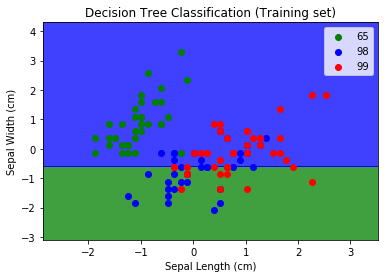

In [59]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

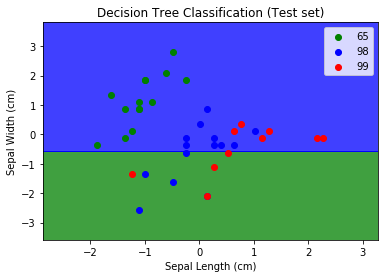

In [60]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

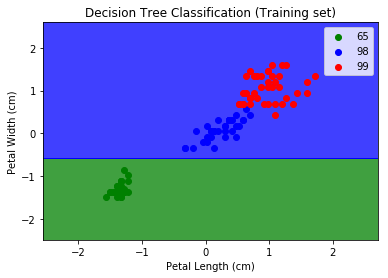

In [61]:
from matplotlib.colors import ListedColormap
X_set2, y_set2 = x_train2, y_train2
X1, X2 = np.meshgrid(np.arange(start = X_set2[:, 0].min() - 1, stop = X_set2[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set2[:, 1].min() - 1, stop = X_set2[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

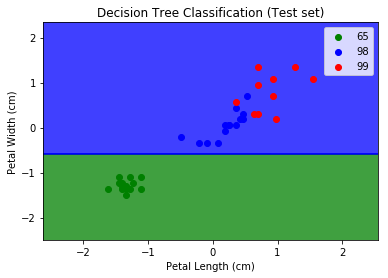

In [62]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set2, y_set2 = x_test2, y_test2
X1, X2 = np.meshgrid(np.arange(start = X_set2[:, 0].min() - 1, stop = X_set2[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set2[:, 1].min() - 1, stop = X_set2[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1],
                color = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()